In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns
# %seaborn inline

In [2]:
df = pd.read_csv("student_success_dataset.csv")

Step 1 - Checking Data

In [3]:
print("Sample Rows")
print(df.head())

Sample Rows
   StudyHours  Attendance  PastScore Internet  SleepHours Passed
0           2          60         40      Yes           5     No
1           5          80         60       No           6    Yes
2           8          90         75      Yes           8    Yes
3           3          70         50      Yes           5     No
4           7          85         70       No           7    Yes


In [7]:
print("Dataset Shape")
print(df.shape)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

Dataset Shape
(20, 6)
Rows: 20, Columns: 6


In [8]:
print("Dataset info")
print(df.info())

Dataset info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB
None


In [9]:
print("Summary Statistics")
print(df.describe(include='all'))

Summary Statistics
        StudyHours  Attendance  PastScore Internet  SleepHours Passed
count    20.000000   20.000000   20.00000       20   20.000000     20
unique         NaN         NaN        NaN        2         NaN      2
top            NaN         NaN        NaN      Yes         NaN    Yes
freq           NaN         NaN        NaN       11         NaN     11
mean      5.100000   74.150000   59.10000      NaN    6.050000    NaN
std       2.845125   17.372922   19.41215      NaN    2.038446    NaN
min       1.000000   40.000000   25.00000      NaN    3.000000    NaN
25%       2.750000   60.000000   43.75000      NaN    4.750000    NaN
50%       5.000000   77.000000   62.50000      NaN    6.000000    NaN
75%       7.250000   88.500000   72.75000      NaN    7.250000    NaN
max      10.000000   99.000000   90.00000      NaN   10.000000    NaN


In [10]:
print("Missing Values")
print(df.isnull().sum())

Missing Values
StudyHours    0
Attendance    0
PastScore     0
Internet      0
SleepHours    0
Passed        0
dtype: int64


Step 2 - Transform to Numerical Value

In [11]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# Now Convert Categorical Clmn to Numerical Clmn 
# Yes = 1, No = 0

# Storing labelEncoder() function from LabelEncoder Library in le variable
le = LabelEncoder()
# Converting Internet Clm from Catergorical To Numerical
df['Internet'] = le.fit_transform(df['Internet'])
# Converting Passed Clm from Categorical To Numerical
df['Passed'] = le.fit_transform(df['Passed'])

# Double Check
print("After Encoding")
print(df.head())

# Checking DataTypes After
print("DataTypes After Cleaning")
print(df.dtypes)

After Encoding
   StudyHours  Attendance  PastScore  Internet  SleepHours  Passed
0           2          60         40         1           5       0
1           5          80         60         0           6       1
2           8          90         75         1           8       1
3           3          70         50         1           5       0
4           7          85         70         0           7       1
DataTypes After Cleaning
StudyHours    int64
Attendance    int64
PastScore     int64
Internet      int64
SleepHours    int64
Passed        int64
dtype: object


Step 3 - Feature Scaling 

In [35]:
# Importing modules
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [39]:
# Feature scaling -> Normalizing Numeric Columns
# Convert them all to 0&1
features = ['StudyHours','Attendance','PastScore','SleepHours'] #Defining which columns want to convert

scaler = StandardScaler() #Calling tha function from StandardScaler

df_scaled = df.copy() #Makes a copy of original dataframe and store that into df_scaler

df_scaled[features] = scaler.fit_transform(df[features]) #using fit_transform funtionality to convert into 0-1

Step 4,5,6,7 - Spliting the Data, Train Model, Make Prediction, Evalute the model

In [40]:
#Importing Spliting Module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
X = df_scaled[features] #Features
y = df_scaled['Passed'] #Targeted Clmn

# Here we used train_test_split to Split the data (Step 4)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# test_size = 0.2 -> For an 80/20 split (80% training, 20% testing):

# Let's train LogisticRegression Model to Train The Model (Step 5)
model = LogisticRegression()
model.fit(X_train, y_train)

# Making Prediction (Step 6)
y_pred = model.predict(X_test)

# Using Classification Report
print("Classification Report")
print(classification_report(y_test,y_pred))

# Using Confusion Matrix to Evalute the Model (Step 7)
conf_matrix = confusion_matrix(y_test,y_pred)

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Step 8 - Visualize Data

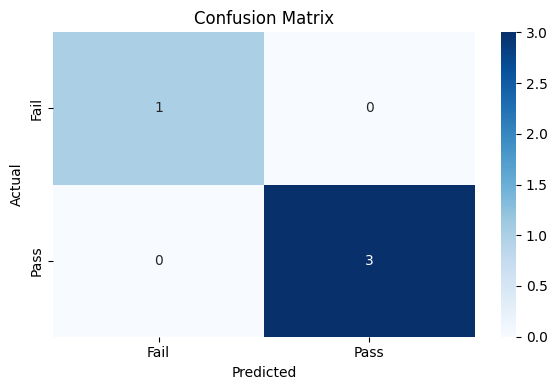

In [47]:
# Ploting a feagure using Matplotlib and SeaBorn
plt.figure(figsize= (6,4))
sns.heatmap(conf_matrix, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["Fail","Pass"], yticklabels = ["Fail","Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [51]:
# Taking User Input
print("------Predict Your Result------")
# Exception Handling
try:
    study_hours = float(input("Enter Study Hours: "))
    attendance = float(input("Enter Attendance: "))
    past_score = float(input("Enter Past Score: "))
    sleep_hours = float(input("Enter Sleep Hours: "))
    
    user_input_df = pd.DataFrame([{
        'StudyHours' : study_hours,
        'Attendance' : attendance,
        'PastScore' : past_score,
        'SleepHours' : sleep_hours
    }])

    # Converting User Input to Scaled DAta 0-1
    user_input_scaled = scaler.transform(user_input_df)

    # Let's Predict The Data
    prediction = model.predict(user_input_scaled)[0]

    # If Else Prediction
    result = "Pass" if prediction == 1 else "Fail"
    print(f"Prediction Based On Input: {result}")

except Exception as e:
    print("An error occured", e)


------Predict Your Result------


Enter Study Hours:  6
Enter Attendance:  40
Enter Past Score:  88
Enter Sleep Hours:  7


Prediction Based On Input: Pass


C:\Users\sahin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
